__Задание 1__

Подберите скорость обучения (alpha) и количество итераций:

In [68]:
# n = X.shape[1]
# alpha = 1e-4
# W = np.array([1, 0.5])
# W, alpha

# for i in range(1500):
#     y_pred = np.dot(W, X)
#     err = calc_mse(y, y_pred)
#     for ii in range(W.shape[0]):
#         W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
#     if i % 100 == 0:
#         print(i, W, err)

In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])

X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

In [71]:
# находим вектор W методом наименьших квадратов
W = np.linalg.inv(X @ X.T) @ X @ y

W

array([47.23214286,  3.91071429])

In [72]:
y_pred = W[0] + W[1] * X[1]
y_pred

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

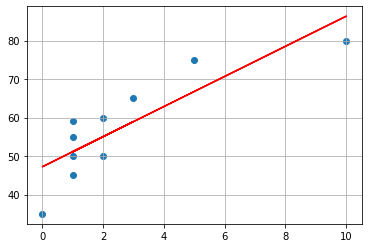

In [73]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred, color = 'red')
plt.grid()

In [74]:
# функция вычисления среднеквадратичной ошибки
def calc_mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

In [75]:
calc_mse(y, y_pred)

45.93749999999999

In [76]:
# вычисление вектора W методом градиентного спуска:
n = X.shape[1]
# alpha = 1e-4
W = np.array([1, 0.5])
accuracy = 1e-10

In [79]:
def gradient_descent(alpha, accuracy):
    W = np.array([1, 0.5])
    W_diff = np.inf
    i = 0
    
    while W_diff > accuracy:
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W_old = W.copy()
        
        for ii in range(W.shape[0]):
            W[ii] -= alpha * (1 / n * 2 * np.sum(X[ii] * (y_pred - y)))
            
        W_diff = np.linalg.norm(W - W_old, ord = 2)    
        i += 1
        
    return i, W, err    

In [80]:
dictionary = {}

for alpha in np.arange(1e-4, 0.0664, 1e-4):
    i, W, err = gradient_descent(alpha, accuracy)
    dictionary[i] = alpha, W, err

In [81]:
i = min(dictionary.keys())
alpha, W, err = dictionary[i]

In [93]:
print(f'\nЗаданная точность: {accuracy}\nСкорость обучения, при которой количество итераций минимально: {alpha:.4f}\
\nМинимальное количество итераций = {i}\nW0 = {W[0]}\nW1 = {W[1]}\nСреднеквадратичная ошибка = {err}')


Заданная точность: 1e-10
Скорость обучения, при которой количество итераций минимально: 0.0638
Минимальное количество итераций = 353
W0 = 47.23214285582216
W1 = 3.910714285968081
Среднеквадратичная ошибка = 45.9375
